In [888]:
import os, math
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op
import xlrd as xl
from tqdm import tqdm, trange
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import pstdev, mean
from tensorflow.keras.models import load_model
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split, KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [889]:
import os

# Define the directory containing the xlsx files
directory = r'C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder'  # Use absolute path with raw string

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")
else:
    print(f"Directory exists: {directory}")

# Initialize a dictionary to store file sizes
file_sizes = {}

# Iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        print(f"Found file: {filename}")  # Print each file found
        if filename.endswith('.xlsx'):
            # Get the full file path
            file_path = os.path.join(root, filename)
            # Get the size of the file
            file_size = os.path.getsize(file_path)
            # Store the size in the dictionary
            file_sizes[filename] = file_size

# Check if any xlsx files were found
if not file_sizes:
    print("No xlsx files found in the directory.")
else:
    # Find the largest file
    largest_file = max(file_sizes, key=file_sizes.get)
    largest_size = file_sizes[largest_file]
    print(f"The largest file is {largest_file} with a size of {largest_size} bytes.")


Directory exists: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder
Found file: 2000_0_20201230.xlsx
Found file: 2001_0_20201102.xlsx
Found file: 2002_0_20210513.xlsx
Found file: 2003_0_20210615.xlsx
Found file: 2004_0_20211028.xlsx
Found file: 2005_0_20211201.xlsx
Found file: 2006_0_20211112.xlsx
Found file: 2007_0_20220108.xlsx
Found file: 2008_0_20220118.xlsx
Found file: 2009_0_20211103.xlsx
Found file: 2010_0_20220111.xlsx
Found file: 2011_0_20220123.xlsx
Found file: 2012_0_20220126.xlsx
Found file: 2013_0_20220123.xlsx
Found file: 2014_0_20201224.xlsx
Found file: 2017_0_20210102.xlsx
The largest file is 2014_0_20201224.xlsx with a size of 42549 bytes.


In [890]:
import pandas as pd

# Define the file path for the Excel file
xlsx_file_path = r'C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\t2_new_training_folder\2015_0_20210203.xlsx'

# Read the Excel file
dataFrame = pd.read_excel(xlsx_file_path)

# Display the first few rows to verify
dataFrame.head()

,Date,CGM (mg / dl),CBG (mg / dl),Blood Ketone (mmol / L),Dietary intake,饮食,Insulin dose - s.c.,Non-insulin hypoglycemic agents,"CSII - bolus insulin (Novolin R, IU)","CSII - basal insulin (Novolin R, IU / H)",Insulin dose - i.v.
0,2021-02-03 14:30:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-03 14:45:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03 15:00:00,127.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-03 15:15:00,122.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-03 15:30:00,120.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [891]:
# Display the shape/size of the data
dataFrame.shape

(1339, 11)

In [892]:
# Display first 100 values of the data
dataFrame.head(100)

,Date,CGM (mg / dl),CBG (mg / dl),Blood Ketone (mmol / L),Dietary intake,饮食,Insulin dose - s.c.,Non-insulin hypoglycemic agents,"CSII - bolus insulin (Novolin R, IU)","CSII - basal insulin (Novolin R, IU / H)",Insulin dose - i.v.
0,2021-02-03 14:30:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-03 14:45:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03 15:00:00,127.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-03 15:15:00,122.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-03 15:30:00,120.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,2021-02-04 14:15:00,244.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2021-02-04 14:30:00,244.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2021-02-04 14:45:00,241.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2021-02-04 15:00:00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [893]:
# Display last 100 values of the data
dataFrame.tail(100)

,Date,CGM (mg / dl),CBG (mg / dl),Blood Ketone (mmol / L),Dietary intake,饮食,Insulin dose - s.c.,Non-insulin hypoglycemic agents,"CSII - bolus insulin (Novolin R, IU)","CSII - basal insulin (Novolin R, IU / H)",Insulin dose - i.v.
1239,2021-02-16 12:15:00,149.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,2021-02-16 12:30:00,151.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,2021-02-16 12:45:00,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,2021-02-16 13:00:00,153.0,147.6,NaN,Buckwheat noodles 150 g\nShrimp 50 g,\n荞麦面150g\n虾50g,NaN,"pioglitazone 15 mg, metformin 500 mg",NaN,NaN,NaN
1243,2021-02-16 13:15:00,167.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1334,2021-02-17 12:00:00,133.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,2021-02-17 12:15:00,140.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,2021-02-17 12:30:00,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,2021-02-17 12:45:00,169.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [894]:
# Check for missing values in each column
dataFrame.isnull().sum()

Date                                           0
CGM (mg / dl)                                  0
CBG (mg / dl)                               1245
Blood Ketone (mmol / L)                     1339
Dietary intake                              1294
饮食                                          1282
Insulin dose - s.c.                         1326
Non-insulin hypoglycemic agents             1325
CSII - bolus insulin (Novolin R, IU)        1339
CSII - basal insulin (Novolin R, IU / H)    1339
Insulin dose - i.v.                         1339
dtype: int64

In [895]:
# Get a concise summary of the DataFrame
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      1339 non-null   datetime64[ns]
 1   CGM (mg / dl)                             1339 non-null   float64       
 2   CBG (mg / dl)                             94 non-null     float64       
 3   Blood Ketone (mmol / L)                   0 non-null      float64       
 4   Dietary intake                            45 non-null     object        
 5   饮食                                        57 non-null     object        
 6   Insulin dose - s.c.                       13 non-null     object        
 7   Non-insulin hypoglycemic agents           14 non-null     object        
 8   CSII - bolus insulin (Novolin R, IU)      0 non-null      float64       
 9   CSII - basal insulin (Novolin 

In [896]:
# Generate descriptive statistics
dataFrame.describe()

,CGM (mg / dl),CBG (mg / dl),Blood Ketone (mmol / L),"CSII - bolus insulin (Novolin R, IU)","CSII - basal insulin (Novolin R, IU / H)",Insulin dose - i.v.
count,1339.000000,94.000000,0.0,0.0,0.0,0.0
mean,187.681255,182.968085,NaN,NaN,NaN,NaN
std,43.609280,49.478235,NaN,NaN,NaN,NaN
min,91.800000,93.600000,NaN,NaN,NaN,NaN
25%,156.600000,144.450000,NaN,NaN,NaN,NaN
50%,178.200000,170.100000,NaN,NaN,NaN,NaN
75%,216.000000,216.000000,NaN,NaN,NaN,NaN
max,334.800000,340.200000,NaN,NaN,NaN,NaN


In [897]:
# Check for missing values and return a DataFrame of boolean values
dataFrame.isna().sum()

Date                                           0
CGM (mg / dl)                                  0
CBG (mg / dl)                               1245
Blood Ketone (mmol / L)                     1339
Dietary intake                              1294
饮食                                          1282
Insulin dose - s.c.                         1326
Non-insulin hypoglycemic agents             1325
CSII - bolus insulin (Novolin R, IU)        1339
CSII - basal insulin (Novolin R, IU / H)    1339
Insulin dose - i.v.                         1339
dtype: int64

In [898]:
# Rename the column if needed
dataFrame.rename(columns={'Date': 'Time'}, inplace=True)

# Extract the column
glucose_values = dataFrame['Time']

# Display the first few values to verify
print(glucose_values.head())

0   2021-02-03 14:30:00
1   2021-02-03 14:45:00
2   2021-02-03 15:00:00
3   2021-02-03 15:15:00
4   2021-02-03 15:30:00
Name: Time, dtype: datetime64[ns]


In [899]:
# Get unique values in the 'Time' column
dataFrame['Time'].unique()

array(['2021-02-03T14:30:00.000000000', '2021-02-03T14:45:00.000000000',
       '2021-02-03T15:00:00.000000000', ...,
       '2021-02-17T12:30:00.000000000', '2021-02-17T12:45:00.000000000',
       '2021-02-17T13:00:00.000000000'], dtype='datetime64[ns]')

In [900]:
# Rename the column CGM (mg / dl) to CGM
dataFrame.rename(columns={'CGM (mg / dl)': 'CGM'}, inplace=True)

# Display the first few rows to verify
dataFrame.head()

,Time,CGM,CBG (mg / dl),Blood Ketone (mmol / L),Dietary intake,饮食,Insulin dose - s.c.,Non-insulin hypoglycemic agents,"CSII - bolus insulin (Novolin R, IU)","CSII - basal insulin (Novolin R, IU / H)",Insulin dose - i.v.
0,2021-02-03 14:30:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-03 14:45:00,131.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03 15:00:00,127.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-03 15:15:00,122.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-03 15:30:00,120.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [901]:
# Get only necessary columns
glucoseTime = dataFrame[['Time', 'CGM']]

glucoseTime.head()

,Time,CGM
0,2021-02-03 14:30:00,131.4
1,2021-02-03 14:45:00,131.4
2,2021-02-03 15:00:00,127.8
3,2021-02-03 15:15:00,122.4
4,2021-02-03 15:30:00,120.6


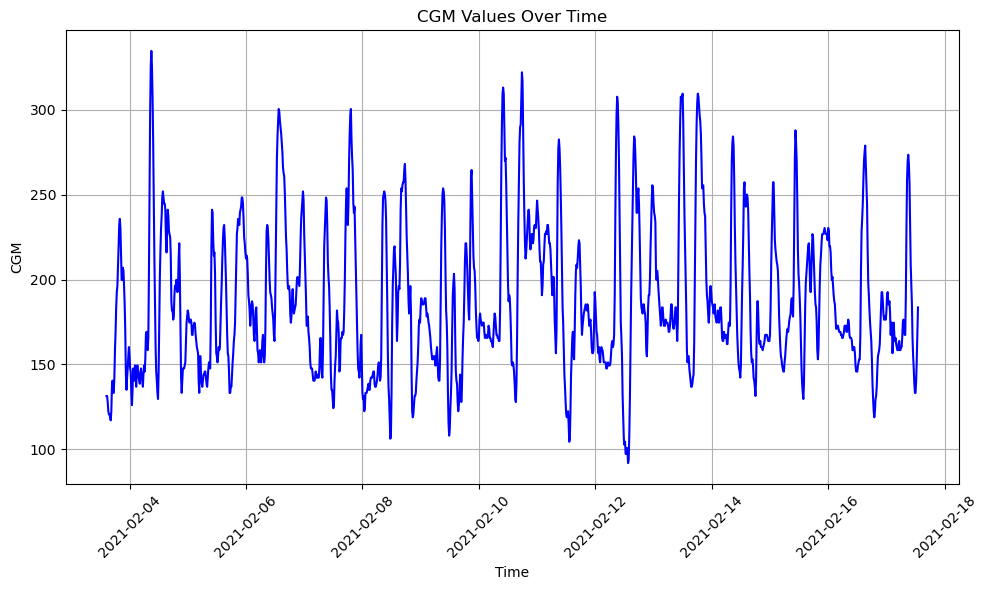

In [902]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(glucoseTime['Time'], glucoseTime['CGM'], color='b')
plt.title('CGM Values Over Time')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set x-axis ticks to a specific interval
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust nbins to your preference

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [903]:
# Resample Data

In [904]:
glucoseTime.shape

(1339, 2)

In [905]:
glucoseTime.columns

Index(['Time', 'CGM'], dtype='object')

In [906]:
glucoseTime.head()

,Time,CGM
0,2021-02-03 14:30:00,131.4
1,2021-02-03 14:45:00,131.4
2,2021-02-03 15:00:00,127.8
3,2021-02-03 15:15:00,122.4
4,2021-02-03 15:30:00,120.6


In [907]:
# Assuming glucoseTime is already defined as shown previously
glucoseTime = dataFrame[['Time', 'CGM']]
glucoseTime.shape

(1339, 2)

In [908]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Time                                      1339 non-null   datetime64[ns]
 1   CGM                                       1339 non-null   float64       
 2   CBG (mg / dl)                             94 non-null     float64       
 3   Blood Ketone (mmol / L)                   0 non-null      float64       
 4   Dietary intake                            45 non-null     object        
 5   饮食                                        57 non-null     object        
 6   Insulin dose - s.c.                       13 non-null     object        
 7   Non-insulin hypoglycemic agents           14 non-null     object        
 8   CSII - bolus insulin (Novolin R, IU)      0 non-null      float64       
 9   CSII - basal insulin (Novolin 

In [909]:
glucoseTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1339 non-null   datetime64[ns]
 1   CGM     1339 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.0 KB


In [910]:
glucoseTime.head()

,Time,CGM
0,2021-02-03 14:30:00,131.4
1,2021-02-03 14:45:00,131.4
2,2021-02-03 15:00:00,127.8
3,2021-02-03 15:15:00,122.4
4,2021-02-03 15:30:00,120.6


In [911]:
# Drop any rows with invalid datetime entries
# Should be same size
glucoseTime.dropna(subset=['CGM'], inplace=True)
glucoseTime.shape

c:\Users\19176\Documents\Anaconda\envs\tf_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(1339, 2)

In [912]:
print(glucoseTime.isnull().sum())

Time    0
CGM     0
dtype: int64


In [913]:
# Assuming your DataFrame is named glucoseTime and it has a column 'timestamp' with datetime information
glucoseTime['Time'] = pd.to_datetime(glucoseTime['Time'])  # Convert the column to datetime format

glucoseTime.set_index('Time', inplace=True)  # Set the datetime column as the index

# Now you can resample the data
thirty_minute_resampled = glucoseTime.resample('30T').mean()

# Display the first few rows of the resampled data
print(thirty_minute_resampled.head())
print(thirty_minute_resampled.shape)

                       CGM
Time                      
2021-02-03 14:30:00  131.4
2021-02-03 15:00:00  125.1
2021-02-03 15:30:00  120.6
2021-02-03 16:00:00  117.9
2021-02-03 16:30:00  129.6
(670, 1)


c:\Users\19176\Documents\Anaconda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


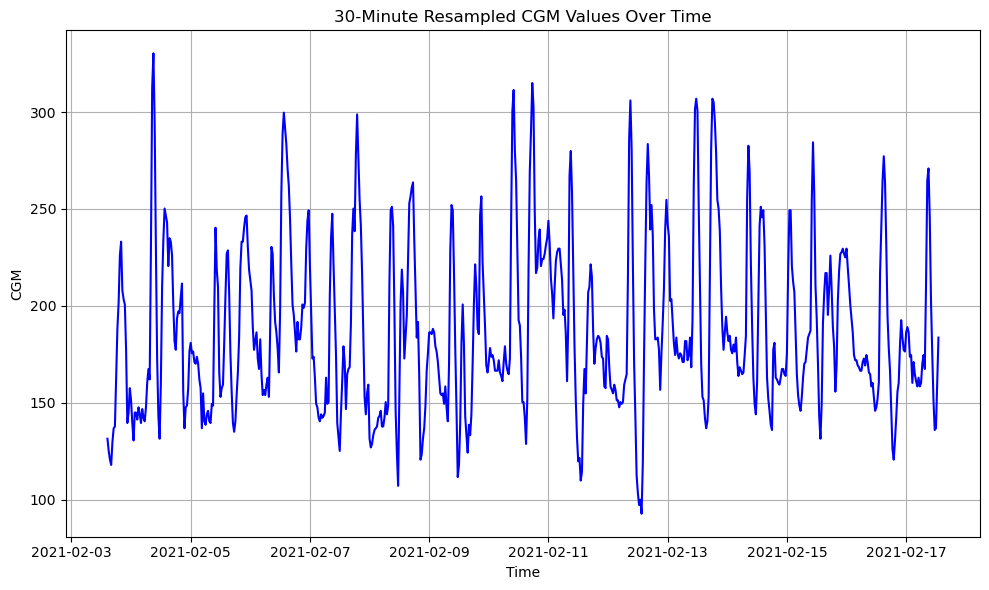

In [914]:
# Plotting the resampled data
plt.figure(figsize=(10, 6))
plt.plot(thirty_minute_resampled.index, thirty_minute_resampled['CGM'], color='b')
plt.title('30-Minute Resampled CGM Values Over Time')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.grid(True)
plt.xticks(rotation=0)  # Change rotation to 0 for horizontal labels
plt.tight_layout()
plt.show()

In [915]:
# Change the input data

In [916]:
# Modify the Dataset
thirty_minute_resampled['CGM_predict'] = thirty_minute_resampled['CGM'].shift(-1)
thirty_minute_resampled.dropna(inplace=True)

thirty_minute_resampled.head()

,CGM,CGM_predict
Time,,
2021-02-03 14:30:00,131.4,125.1
2021-02-03 15:00:00,125.1,120.6
2021-02-03 15:30:00,120.6,117.9
2021-02-03 16:00:00,117.9,129.6
2021-02-03 16:30:00,129.6,136.8


In [917]:
# Create cleaned training file
thirty_minute_resampled.to_csv("cleaned_2015_0_20210203.csv", encoding='utf-8', index=True, header=True)

In [918]:
import pandas as pd

# Define the file path for the CSV file
file_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\t2_cleaned_training_folder\cleaned_2015_0_20210203.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                  Time    CGM  CGM_predict
0  2021-02-03 14:30:00  131.4        125.1
1  2021-02-03 15:00:00  125.1        120.6
2  2021-02-03 15:30:00  120.6        117.9
3  2021-02-03 16:00:00  117.9        129.6
4  2021-02-03 16:30:00  129.6        136.8


In [919]:
import os
import pandas as pd

# Define the folder path
folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder"

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):  # Process only Excel files
        # Construct full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Load the Excel file into a DataFrame
        dataFrame = pd.read_excel(file_path, engine='openpyxl')
        
        # Rename columns to standardize names
        if 'Date' in dataFrame.columns and 'CGM (mg / dl)' in dataFrame.columns:
            dataFrame.rename(columns={'Date': 'Time', 'CGM (mg / dl)': 'CGM'}, inplace=True)

            # Get only necessary columns: Time, CGM
            dataFrame = dataFrame[['Time', 'CGM']]

            # Convert the 'Time' column to datetime format if it's not already
            dataFrame['Time'] = pd.to_datetime(dataFrame['Time'], format='%d-%b-%Y %H:%M:%S', errors='coerce')

            # Drop any rows with invalid datetime entries
            dataFrame.dropna(subset=['Time', 'CGM'], inplace=True)

            # Ensure the 'Time' column is set as the index
            dataFrame.set_index('Time', inplace=True)

            # Resample the data to 30-minute frequency and calculate the mean
            dataFrame = dataFrame.resample('30T').mean()

            # Shift data to Get CGM_Predict
            dataFrame['CGM_predict'] = dataFrame['CGM'].shift(-1)
            dataFrame.dropna(inplace=True)

            # Construct the new file name
            new_name = f"cleaned_{file_name.replace('.xlsx', '')}_t2dm.csv"
            new_file_path = os.path.join(folder_path, new_name)

            # Save the cleaned data to a new CSV file
            dataFrame.to_csv(new_file_path, encoding='utf-8', index=True, header=True)
            print(f"Processed and saved: {new_file_path}")
        else:
            print(f"Skipping file due to missing columns: {file_name}")


Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2000_0_20201230_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2001_0_20201102_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2002_0_20210513_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2003_0_20210615_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2004_0_20211028_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2005_0_20211201_t2dm.csv
Processed and saved: C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\Shanghai_T2DM\t2_new_testing_folder\cleaned_2006_0_20211112_t